In [10]:
import seaborn as sns
from torch.distributions import Beta, Dirichlet

In [80]:
def sample_and_plot_kde(α, β, n_samples):
    dist = Beta(torch.FloatTensor([α]), torch.FloatTensor([β]))
    data = dist.sample((n_samples,)).squeeze(1).numpy()
    g = sns.kdeplot(data)
    g.set(xlim=(0, 1))
    g.grid()

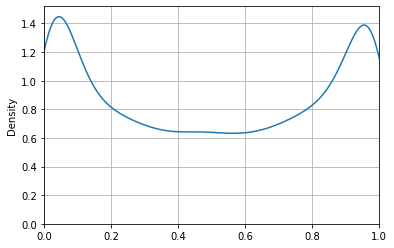

In [84]:
sample_and_plot_kde(α=0.5,β=0.5,n_samples=10000)

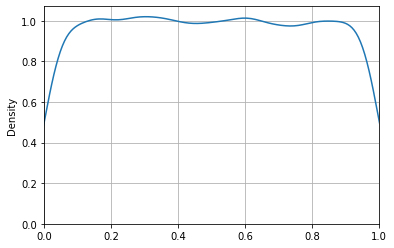

In [85]:
sample_and_plot_kde(α=1,β=1,n_samples=10000)

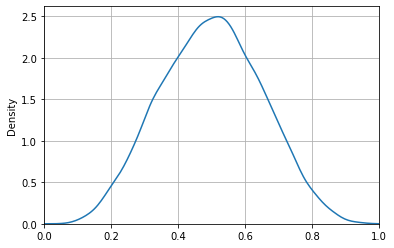

In [89]:
sample_and_plot_kde(α=5,β=5,n_samples=10000)

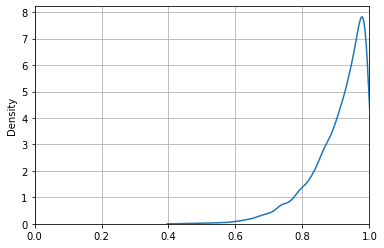

In [90]:
sample_and_plot_kde(α=10,β=1,n_samples=10000)

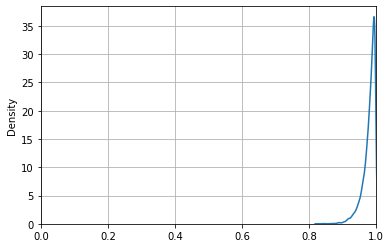

In [91]:
sample_and_plot_kde(α=50,β=1,n_samples=10000)

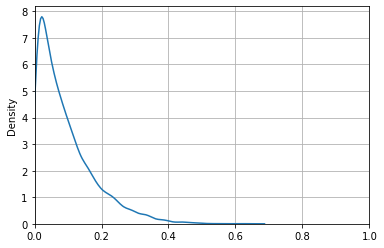

In [92]:
sample_and_plot_kde(α=1,β=10,n_samples=10000)

## Dirichlet Distribution

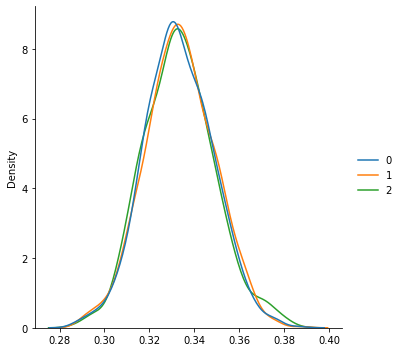

In [135]:
α1 = 300
α2 = 300
α3 = 300
dist = Dirichlet(torch.FloatTensor([α1, α2, α3]))
data = dist.sample((1000,)).numpy()
sns.displot(data=data, kind="kde")

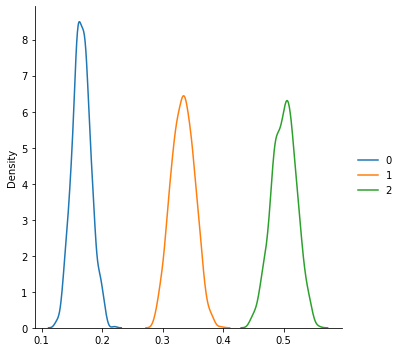

In [136]:
α1 = 100
α2 = 200
α3 = 300
dist = Dirichlet(torch.FloatTensor([α1, α2, α3]))
data = dist.sample((1000,)).numpy()
sns.displot(data=data, kind="kde")

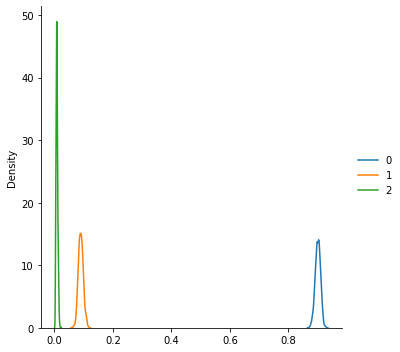

In [151]:
α1 = 1000
α2 = 100
α3 = 10
dist = Dirichlet(torch.FloatTensor([α1, α2, α3]))
data = dist.sample((1000,)).numpy()
sns.displot(data=data, kind="kde")

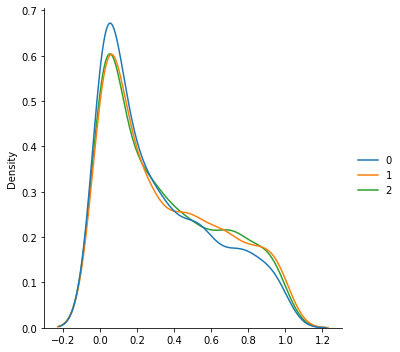

In [139]:
α1 = 0.5
α2 = 0.5
α3 = 0.5
dist = Dirichlet(torch.FloatTensor([α1, α2, α3]))
data = dist.sample((1000,)).numpy()
sns.displot(data=data, kind="kde")

In [140]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

__all__ = [
    "cartesian",
    "barycentric",
    "contour",
    "contourf",
    "scatter",
]

In [141]:
def cartesian(points):
    """Converts array of barycentric coordinates on a 2-simplex to an array of
    Cartesian coordinates on a 2D triangle in the first quadrant.
    Parameters
    ----------
    points : (N, 3) shape array
        Points on a 2-simplex.
    Returns
    -------
    (N, 2) shape array
        Cartesian coordinate points.
    Examples
    --------
    >>> cartesian((1,0,0))
    array([0, 0])
    >>> cartesian((0,1,0))
    array([0, 1])
    >>> cartesian((0,0,1))
    array([0.5, 0.8660254037844386]) # == [0.5, sqrt(3)/2]"""
    points = np.asanyarray(points)
    ndim = points.ndim  # will use this to have similar output shape to input
    if ndim == 1:
        points = points.reshape((1, points.size))
    d = points.sum(axis=1)  # in case values aren't normalized
    x = 0.5 * (2 * points[:, 1] + points[:, 2]) / d
    y = (np.sqrt(3.0) / 2) * points[:, 2] / d
    out = np.vstack([x, y]).T
    if ndim == 1:
        return out.reshape((2,))
    return out

In [142]:
def barycentric(points):
    """Inverse of :func:`cartesian`."""
    points = np.asanyarray(points)
    ndim = points.ndim
    if ndim == 1:
        points = points.reshape((1, points.size))
    c = (2 / np.sqrt(3.0)) * points[:, 1]
    b = (2 * points[:, 0] - c) / 2.0
    a = 1.0 - c - b
    out = np.vstack([a, b, c]).T
    if ndim == 1:
        return out.reshape((3,))
    return out

In [155]:
def contour(f, vertexlabels=None, **kwargs):
    """Contour line plot on a 2D triangle of a function evaluated at
    barycentric 2-simplex points.
    Parameters
    ----------
    f : function
        Function to evaluate on (N, 3) ndarray of coordinates
    vertexlabels : (str, str, str)
        Labels for corners of the plot, in the order
        ``(a, b, c)`` where ``a == (1,0,0)``, ``b == (0,1,0)``,
        ``c == (0,0,1)``.
    **kwargs : any
        Arguments to :func:`plt.tricontour`.
        
    Returns
    -------
    matplotlib.figure.Figure
        The drawn contour line plot figure."""
    return _contour(f, vertexlabels, contourfunc=plt.tricontour, **kwargs)


def contourf(f, vertexlabels=None, **kwargs):
    """Filled contour plot on a 2D triangle of a function evaluated at
    barycentric 2-simplex points.
    Function signature is identical to :func:`contour` with the caveat that
    ``**kwargs`` are passed on to :func:`plt.tricontourf`."""
    return _contour(f, vertexlabels, contourfunc=plt.tricontourf, **kwargs)


def _contour(f, vertexlabels=None, contourfunc=None, **kwargs):
    """Workhorse function for ``contour`` and ``contourf``.
    Parameters
    ----------
    contourfunc : function
        The contour plotting function to use for actual plotting."""

    if contourfunc is None:
        contourfunc = plt.tricontour
    if vertexlabels is None:
        vertexlabels = ("1", "2", "3")
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, np.sqrt(3.0) / 2.0, 100)
    points2d = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])
    points3d = barycentric(points2d)
    valid = (points3d.sum(axis=1) == 1.0) & ((0.0 <= points3d).all(axis=1))
    points2d = points2d[np.where(valid), :][0]
    points3d = points3d[np.where(valid), :][0]
    z = f(points3d)
    contourfunc(points2d[:, 0], points2d[:, 1], z, **kwargs)
    _draw_axes(vertexlabels)
    return plt.gcf()


def _draw_axes(vertexlabels):
    l1 = matplotlib.lines.Line2D([0, 0.5, 1.0, 0], [0, np.sqrt(3) / 2, 0, 0], color="k")
    axes = plt.gca()
    axes.add_line(l1)
    axes.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
    axes.yaxis.set_major_locator(matplotlib.ticker.NullLocator())
    axes.text(-0.05, -0.05, vertexlabels[0])
    axes.text(1.05, -0.05, vertexlabels[1])
    axes.text(0.5, np.sqrt(3) / 2 + 0.05, vertexlabels[2])
    axes.set_xlim(-0.2, 1.2)
    axes.set_ylim(-0.2, 1.2)
    axes.set_aspect("equal")
    return axes

In [156]:
def scatter(points, vertexlabels=None, **kwargs):
    """Scatter plot of barycentric 2-simplex points on a 2D triangle.
    Parameters
    ----------
    points : (N, 3) shape array
        N points on a 2-simplex
    vertexlabels : (str, str, str)
        Labels for corners of the plot, in the order
        ``(a, b, c)`` where ``a == (1,0,0)``, ``b == (0,1,0)``,
        ``c == (0,0,1)``.
    **kwargs : any
        Arguments to :func:`plt.scatter`.
    
    Returns
    -------
    matplotlib.figure.Figure
        The drawn simplex plot figure."""
    if vertexlabels is None:
        vertexlabels = ("1", "2", "3")

    projected = cartesian(points)
    plt.scatter(projected[:, 0], projected[:, 1], **kwargs)

    _draw_axes(vertexlabels)
    return plt.gcf()

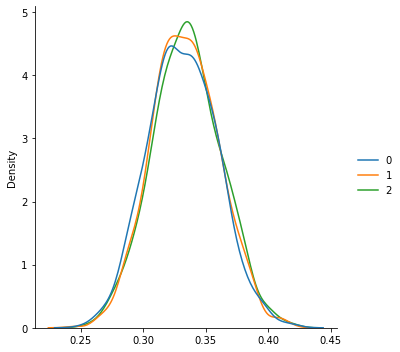

In [178]:
α1 = 100
α2 = 100
α3 = 100
dist = Dirichlet(torch.FloatTensor([α1, α2, α3]))
data = dist.sample((1000,)).numpy()
sns.displot(data=data, kind="kde")

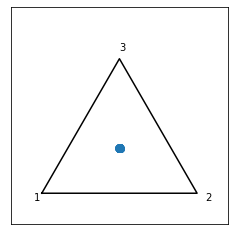

In [195]:
plot = scatter(data)

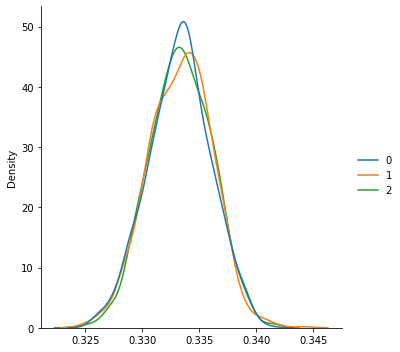

In [196]:
α1 = 10000
α2 = 10000
α3 = 10000
dist = Dirichlet(torch.FloatTensor([α1, α2, α3]))
data = dist.sample((1000,)).numpy()
sns.displot(data=data, kind="kde")

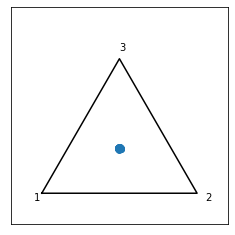

In [197]:
plot = scatter(data)

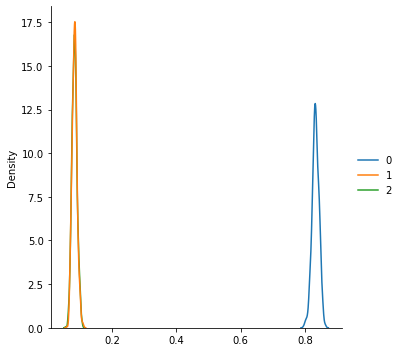

In [198]:
α1 = 1000
α2 = 100
α3 = 100
dist = Dirichlet(torch.FloatTensor([α1, α2, α3]))
data = dist.sample((1000,)).numpy()
sns.displot(data=data, kind="kde");

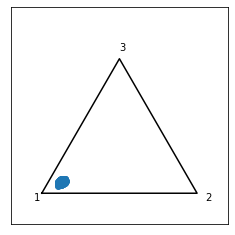

In [199]:
plot = scatter(data)

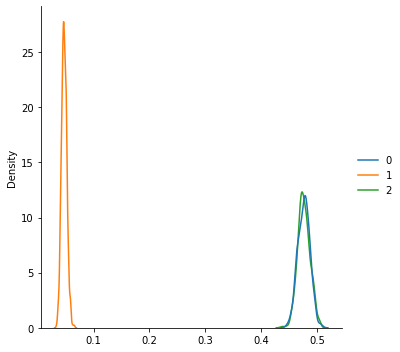

In [200]:
α1 = 1000
α2 = 100
α3 = 1000
dist = Dirichlet(torch.FloatTensor([α1, α2, α3]))
data = dist.sample((1000,)).numpy()
sns.displot(data=data, kind="kde");

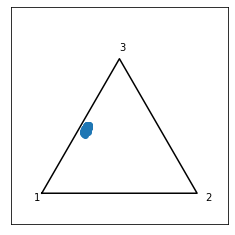

In [201]:
plot = scatter(data)

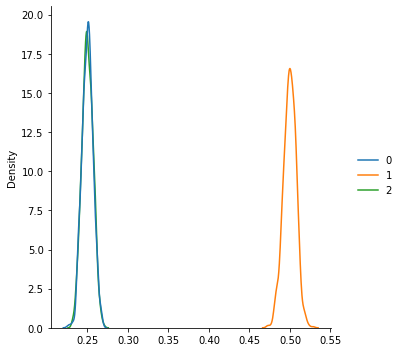

In [202]:
α1 = 1000
α2 = 2000
α3 = 1000
dist = Dirichlet(torch.FloatTensor([α1, α2, α3]))
data = dist.sample((1000,)).numpy()
sns.displot(data=data, kind="kde");

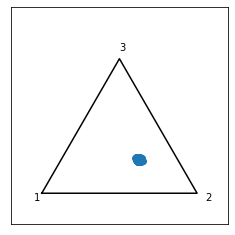

In [203]:
plot = scatter(data)